In [19]:
import numpy as np 
import matplotlib.pyplot as plt 

In [20]:
xmin = int(input("Enter window x min: "))
ymin = int(input("Enter window y min: "))
xmax = int(input("Enter window x max: "))
ymax = int(input("Enter window y max: "))


In [21]:
grid = np.zeros((xmax+5,ymax+5))

In [22]:
def dda_line(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    
    steps = max(abs(dx), abs(dy))
    
    # Avoid division by zero (if steps=0, it's just a single point)
    if steps == 0:
        return [(round(x1), round(y1))]
    
    x_inc = dx / steps
    y_inc = dy / steps
    
    x, y = x1, y1
    points = []
    
    for _ in range(steps + 1):  # +1 to include both endpoints
        points.append((round(x), round(y)))
        x += x_inc
        y += y_inc
    
    return points

In [23]:
def draw_window(xl,yl,xh,yh):
    points1 = dda_line(xl,yl,xh,yl)
    points2 = dda_line(xl,yl,xl,yh)
    points3 = dda_line(xl,yh,xh,yh)
    points4 = dda_line(xh,yl,xh,yh)
    for point in points1:
        grid[point[0]][point[1]]=1
    for point in points2:
        grid[point[0]][point[1]]=1
    for point in points3:
        grid[point[0]][point[1]]=1
    for point in points4:
        grid[point[0]][point[1]]=1
draw_window(xmin,ymin,xmax,ymax)

In [24]:
grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(55, 55))

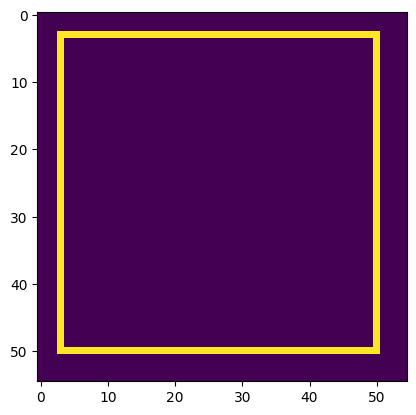

In [25]:
plt.imshow(grid)

In [26]:
def boundary_fill(x,y):
    if grid[x][y] != 1 and grid[x][y] != 2:
        grid[x][y] = 2
    else:
        return 
    boundary_fill(x+1,y)
    boundary_fill(x-1,y)
    boundary_fill(x,y+1)
    boundary_fill(x,y-1)
    boundary_fill(x+1,y+1)
    boundary_fill(x-1,y-1)
    boundary_fill(x+1,y-1)
    boundary_fill(x-1,y+1)
boundary_fill(int((xmax+xmin)/2), int((xmax+xmin)/2))

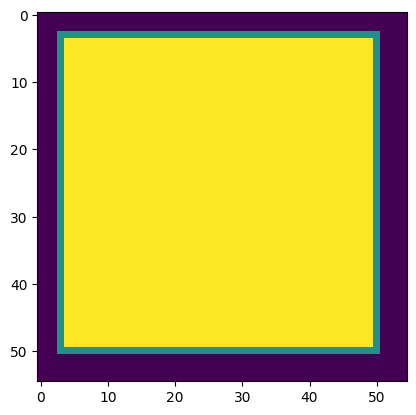

In [27]:
plt.imshow(grid)